In [1]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, roc_curve, auc
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:

# Load the data from CSV file
print("Step 1: Loading Data")
data = pd.read_csv("final_data_only_tpm.csv")

# Separate features (X) and labels (y)
X = data.drop("cancer_type", axis=1)
y = data["cancer_type"]

# Encode categorical labels to numerical format (if needed)
print("Step 2: Encoding Labels")
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
print("Step 3: Splitting Data")
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Standardize the feature values (optional, but often recommended)
print("Step 4: Standardizing Features")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Print the shapes of the datasets
print("Shapes after preprocessing:")
print("X_train:", X_train_scaled.shape)
print("X_test:", X_test_scaled.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


Step 1: Loading Data
Step 2: Encoding Labels
Step 3: Splitting Data
Step 4: Standardizing Features
Shapes after preprocessing:
X_train: (822, 60660)
X_test: (206, 60660)
y_train: (822,)
y_test: (206,)


In [3]:

# Continue from where we left off after scaling

# Step 4: Define the Neural Network Class
print("Step 4: Define the Neural Network Class")

class SimpleClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(SimpleClassifier, self).__init__()
        # Define layers
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        # Define forward pass
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.softmax(x)
        return x

# Step 5: Initialize the Neural Network
print("Step 5: Initialize the Neural Network")

input_size = X_train_scaled.shape[1]  # Number of features
hidden_size = 64  # You can adjust this based on experimentation
num_classes = len(set(y_train))  # Number of unique classes

model = SimpleClassifier(input_size, hidden_size, num_classes)
print("Neural Network Architecture:")
print(model)

# The next steps will involve defining the loss function, optimizer, and training the model.


Step 4: Define the Neural Network Class
Step 5: Initialize the Neural Network
Neural Network Architecture:
SimpleClassifier(
  (fc1): Linear(in_features=60660, out_features=64, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=64, out_features=3, bias=True)
  (softmax): Softmax(dim=1)
)


In [ ]:
#1. Variante ohne Test Werte aber funktioniert soweit
"""
# Step 6: Define Loss Function and Optimizer
print("Step 6: Define Loss Function and Optimizer")

# CrossEntropyLoss is commonly used for classification problems
criterion = nn.CrossEntropyLoss()

# Adam optimizer is a popular choice for optimization
optimizer = optim.Adam(model.parameters(), lr=0.001)  # You can adjust the learning rate

# Step 7: Training the Neural Network
print("Step 7: Training the Neural Network")

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)

# Number of training epochs
num_epochs = 75  # You can adjust the number of epochs

for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print the loss every few epochs
    if (epoch + 1) % 5 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

print("Training complete!")
"""

In [ ]:
#ALT aber funktioniert teil2 
"""
# Step 6: Define Loss Function and Optimizer
print("Step 6: Define Loss Function and Optimizer")

# CrossEntropyLoss is commonly used for classification problems
criterion = nn.CrossEntropyLoss()

# Adam optimizer is a popular choice for optimization
optimizer = optim.Adam(model.parameters(), lr=0.001)  # You can adjust the learning rate

# Step 7: Training the Neural Network with Test Printing
print("Step 7: Training the Neural Network with Test Printing")

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Number of training epochs
num_epochs = 25  # You can adjust the number of epochs

for epoch in range(num_epochs):
    # Training
    model.train()  # Set the model to training mode
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    _, predicted = torch.max(outputs, 1)
    correct = (predicted == y_train_tensor).sum().item()
    accuracy = correct / y_train_tensor.size(0)

    # Testing
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        test_outputs = model(X_test_tensor)
        test_loss = criterion(test_outputs, y_test_tensor)
        _, test_predicted = torch.max(test_outputs, 1)
        test_correct = (test_predicted == y_test_tensor).sum().item()
        test_accuracy = test_correct / y_test_tensor.size(0)

    # Print the training and testing information
    if (epoch + 1) % 5 == 0:
        print(f'Epoch: {epoch+1} | Loss: {loss.item():.5f}, Acc: {accuracy * 100:.2f}% | Test Loss: {test_loss.item():.5f}, Test Acc: {test_accuracy * 100:.2f}%')

print("Training complete!")

"""

Step 6: Define Loss Function and Optimizer
Step 7: Training the Neural Network with Test Printing
Epoch: 5 | Loss: 0.65854, Acc: 88.93% | Test Loss: 0.67469, Test Acc: 87.86%
Epoch: 10 | Loss: 0.62520, Acc: 92.82% | Test Loss: 0.63907, Test Acc: 91.26%
Epoch: 15 | Loss: 0.61206, Acc: 93.92% | Test Loss: 0.64049, Test Acc: 91.26%
Epoch: 20 | Loss: 0.59792, Acc: 95.26% | Test Loss: 0.61903, Test Acc: 92.72%
Epoch: 25 | Loss: 0.58816, Acc: 96.35% | Test Loss: 0.60915, Test Acc: 94.66%
Epoch: 30 | Loss: 0.58688, Acc: 96.47% | Test Loss: 0.60873, Test Acc: 94.17%
Epoch: 35 | Loss: 0.58569, Acc: 96.59% | Test Loss: 0.60796, Test Acc: 94.17%
Epoch: 40 | Loss: 0.58548, Acc: 96.59% | Test Loss: 0.60596, Test Acc: 93.69%
Epoch: 45 | Loss: 0.58542, Acc: 96.59% | Test Loss: 0.60338, Test Acc: 94.66%
Epoch: 50 | Loss: 0.58530, Acc: 96.59% | Test Loss: 0.60201, Test Acc: 95.15%


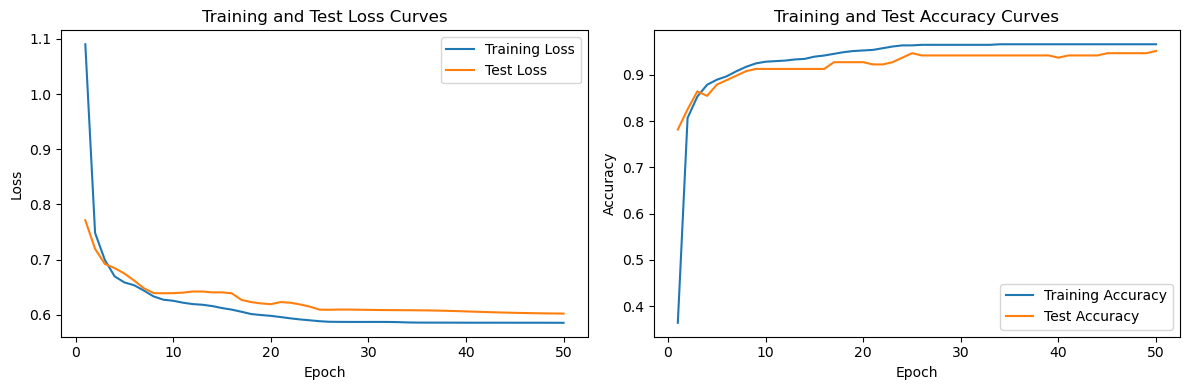

Training complete!


In [4]:
# Step 6: Define Loss Function and Optimizer
print("Step 6: Define Loss Function and Optimizer")

# CrossEntropyLoss is commonly used for classification problems
criterion = nn.CrossEntropyLoss()

# Adam optimizer is a popular choice for optimization
optimizer = optim.Adam(model.parameters(), lr=0.0005)  # You can adjust the learning rate

# Step 7: Training the Neural Network with Test Printing
print("Step 7: Training the Neural Network with Test Printing")

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Number of training epochs
num_epochs = 50  # You can adjust the number of epochs

# Initialize lists to store training and test metrics
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

# Training loop
for epoch in range(num_epochs):
    # Training
    model.train()  # Set the model to training mode
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    _, predicted = torch.max(outputs, 1)
    correct = (predicted == y_train_tensor).sum().item()
    accuracy = correct / y_train_tensor.size(0)

    # Testing
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        test_outputs = model(X_test_tensor)
        test_loss = criterion(test_outputs, y_test_tensor)
        _, test_predicted = torch.max(test_outputs, 1)
        test_correct = (test_predicted == y_test_tensor).sum().item()
        test_accuracy = test_correct / y_test_tensor.size(0)

    # Log metrics
    train_losses.append(loss.item())
    test_losses.append(test_loss.item())
    train_accuracies.append(accuracy)
    test_accuracies.append(test_accuracy)

    # Print the training and testing information
    if (epoch + 1) % 5 == 0:
        print(f'Epoch: {epoch+1} | Loss: {loss.item():.5f}, Acc: {accuracy * 100:.2f}% | Test Loss: {test_loss.item():.5f}, Test Acc: {test_accuracy * 100:.2f}%')

# Plot Learning Curves
plt.figure(figsize=(12, 4))

# Plot Loss Curves
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Test Loss Curves')

# Plot Accuracy Curves
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Test Accuracy Curves')

plt.tight_layout()
plt.show()

print("Training complete!")


In [5]:

# Convert the test data to PyTorch tensors
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Evaluation (Forward pass) on the test set
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs, 1)

# Calculate accuracy
correct = (predicted == y_test_tensor).sum().item()
total = y_test_tensor.size(0)
accuracy = correct / total

print(f'Test Accuracy: {accuracy * 100:.2f}%')


Test Accuracy: 95.15%


Weighted F1 Score on Test Set: 0.9521


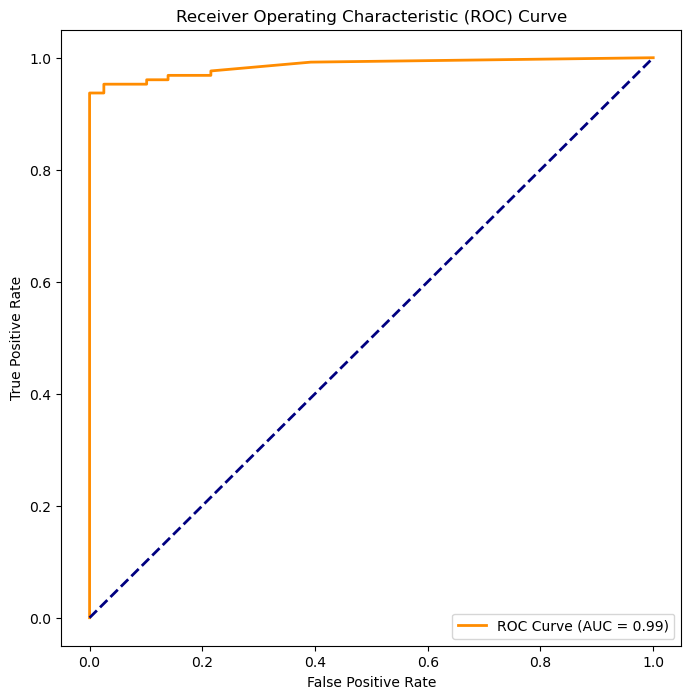

In [6]:

model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    _, predicted_labels = torch.max(test_outputs, 1)

f1 = f1_score(y_test, predicted_labels, average='weighted')
print(f'Weighted F1 Score on Test Set: {f1:.4f}')

# Plot ROC Curve
probs = torch.nn.functional.softmax(test_outputs, dim=1).numpy()
fpr, tpr, thresholds = roc_curve(y_test, probs[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [7]:

# Calculate Precision and Recall
precision = precision_score(y_test, predicted_labels, average=None)
recall = recall_score(y_test, predicted_labels, average=None)

# Print Precision and Recall for each class
for i, (prec, rec) in enumerate(zip(precision, recall)):
    print(f'Class {i}: Precision = {prec:.4f}, Recall = {rec:.4f}')


Class 0: Precision = 0.8333, Recall = 0.9524
Class 1: Precision = 0.9837, Recall = 0.9528
Class 2: Precision = 0.9322, Recall = 0.9483


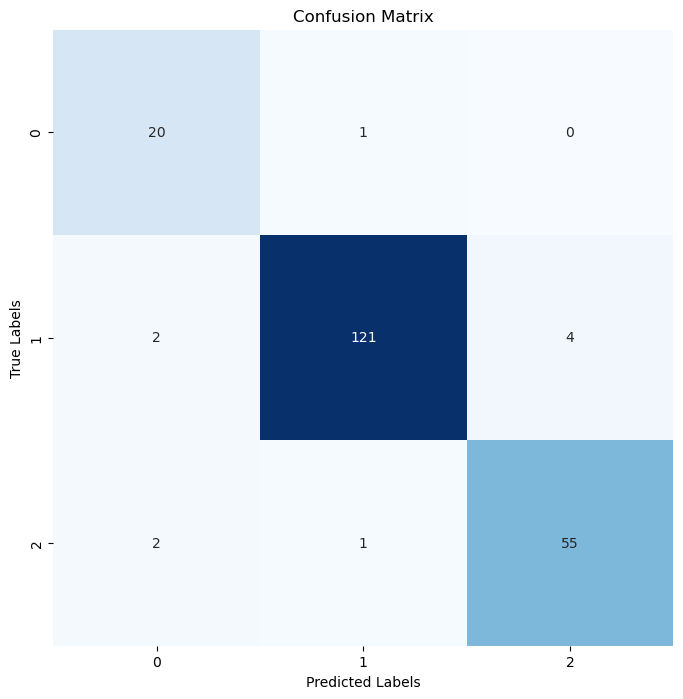

In [8]:

conf_matrix = confusion_matrix(y_test, predicted_labels)
# Visualize Confusion Matrix
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
